In [1]:
## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#for logging
import time

##matrix math
import math

##plotting
import matplotlib.pyplot as plt
from sklearn import preprocessing

import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('D:/Graduate Courses/2019 Dissertation/Data/Other.coins')
print("Current Working Directory " , os.getcwd())

Using TensorFlow backend.


Current Working Directory  D:\Graduate Courses\2019 Dissertation\Data\Other.coins


In [2]:
#Read the merged data 
EOS = pd.read_csv('merge_EOS-USD.csv',na_values='n/a',parse_dates=['Date'])
ETH = pd.read_csv('merge_ETH-USD.csv',na_values='n/a',parse_dates=['Date'])
LTC = pd.read_csv('merge_LTC-USD.csv',na_values='n/a',parse_dates=['Date'])
ZEC = pd.read_csv('merge_ZEC-USD.csv',na_values='n/a',parse_dates=['Date'])
XRP = pd.read_csv('merge_XRP-USD.csv',na_values='n/a',parse_dates=['Date'])

In [3]:
# %load NN3
#!/usr/bin/env python

# In[1]:


import numpy as np
import talib
import pandas as pd
import os
import talib as ta
import time
import datetime

## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#for logging
import time

##matrix math
import math

##plotting
import matplotlib.pyplot as plt
from sklearn import preprocessing


# In[1]:


def load_data(filename):
#Read the data file
    dataset_total = pd.read_csv(filename,na_values='n/a',parse_dates=['Date'],index_col='Date')
    dataset_total=dataset_total.drop(['Unnamed: 0',], axis=1)
    dataset_total= dataset_total.loc[:, (dataset_total!= 0).any(axis=0)]

    #normalize dataset
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_total_scaled = sc.fit_transform(dataset_total)
    X_normal=dataset_total_scaled[:,:-1]
    Y=dataset_total_scaled[:,-1]
    
    #Splitting data set into training (First 80% of data points) and testing data (last 20% of data points)
    split_line = round(0.8 * X_normal.shape[0])
    X_train = X_normal[:int(split_line), :]
    Y_train = Y[:int(split_line)]
    X_test = X_normal[int(split_line):,:]
    Y_test = Y[int(split_line):]
    Y_daybefore = Y[int(split_line)-1:-1]

    #shuffle the training set and test set
    #X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y, test_size=0.2, random_state=37)
    return X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore


# In[2]:


def initialize_model(dropout_rate):
    """
    Initializes and creates the model to be used
    
    Arguments:
    dropout_rate -- A decimal representing how much dropout should be incorporated at each level, in this case 0.2
    activation_function -- A string to define the activation_function, in this case it is linear
    loss_function -- A string to define the loss function to be used, in the case it is mean squared error
    optimizer -- A string to define the optimizer to be used, in the case it is adam
    
    Returns:
    model -- A 3 layer RNN with 100*dropout_value dropout in each layer that uses activation_function as its activation
             function, loss_function as its loss function, and optimizer as its optimizer
    """
  
    #Build the model
    model=Sequential()
    
   
    optimizer='adam'
    loss='mean_squared_error'
    activation='relu'
    input_shape = (X_train.shape[1],)
    model.add(Dense(units = 64,activation=activation, input_shape = input_shape))
    model.add(Dense(units = 64, activation=activation))
    model.add(Dense(units = 32, activation=activation))
    model.add(Dense(units = 1,activation='relu'))
   
    
              
    model.compile(optimizer =optimizer, loss = loss, metrics=['mse'])

    
    return model


# In[3]:


#Training the model

def fit_model(model, X_train, Y_train, batch_num, num_epoch, val_split):
    """
    Fits the model to the training data
    
    Arguments:
    model -- The previously initalized 3 layer Recurrent Neural Network
    X_train -- A tensor of shape (2492, 30, 105) that represents the x values of the training data
    Y_train -- A tensor of shape (2492,) that represents the y values of the training data
    batch_num -- An integer representing the batch size to be used, in this case 100
    num_epoch -- An integer defining the number of epochs to be run, in this case 100
    val_split -- A decimal representing the proportion of training data to be used as validation data
    
    Returns:
    model -- The 3 layer Recurrent Neural Network that has been fitted to the training data
    training_time -- An integer representing the amount of time (in seconds) that the model was training
    """
   

    #Train the model on X_train and Y_train
    history=model.fit(X_train, Y_train, batch_size= batch_num, nb_epoch=num_epoch, validation_split= val_split)

    return model,history


# In[5]:





# In[4]:


# test the model
def test_model(model_name, X_test, Y_test):
    """
    Test the model on the testing data
    
    Arguments:
    model -- The previously fitted 3 layer Recurrent Neural Network
    X_test -- A tensor of shape (623, 30, 105) that represents the x values of the testing data
    Y_test -- A tensor of shape (623,) that represents the y values of the testing data
    unnormalized_bases -- A tensor of shape (623,) that can be used to get unnormalized data points
    
    Returns:
    y_predict -- A tensor of shape (623,) that represnts the normalized values that the model predicts based on X_test
    real_y_test -- A tensor of shape (623,) that represents the actual prices of bitcoin throughout the testing period
    real_y_predict -- A tensor of shape (623,) that represents the model's predicted prices of bitcoin
    fig -- A branch of the graph of the real predicted prices of bitcoin versus the real prices of bitcoin
    """
    #Test the model on X_Test
    Y_norm = model_name.predict(X_test)
    
    # normalize predicted y
    Y_original=dataset_total.iloc[:,-1]
    Y_max=Y_original.max()
    Y_min=Y_original.min()
    real_y_predict = Y_norm *(Y_max-Y_min)+Y_min
    
    # normalize Y_test
    real_y_test = Y_test *(Y_max-Y_min)+Y_min
    
    # normalize real Y_daybefore
    real_y_daybefore = Y_daybefore * (Y_max-Y_min)+Y_min

    #Plot of the predicted prices versus the real prices
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("EOS Return Over Time")
    plt.plot(real_y_predict, color = 'green', label = 'Predicted Return')
    plt.plot(real_y_test, color = 'red', label = 'Real Return')
    ax.set_ylabel("Return")
    ax.set_xlabel("Time (Days)")
    ax.legend()
    
    return Y_norm, real_y_test, real_y_predict, fig, real_y_daybefore


# In[5]:


#evaluate change in return

def return_change(real_y_daybefore, real_y_test, real_y_predict):
    """
    Calculate the percent change between each value and the day before
    
    Arguments:
    real_y_daybefore -- A tensor of shape (623,) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (623,) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (623,) that represents the normalized y values of the model's predictions
    
    Returns:
    delta_predict -- A tensor of shape (623, ) that represents the difference between predicted and day before values
    delta_real -- A tensor of shape (623, ) that represents the difference between real and day before values
    fig -- A plot representing percent change in bitcoin price per day,
    """
    return_change_real = real_y_test - real_y_daybefore
    real_y_predict_reshape= np.reshape(real_y_predict,(real_y_predict.shape[0],))
    return_change_predict = real_y_predict_reshape - real_y_daybefore

    fig_2 = plt.figure(figsize=(10, 6))
    ax = fig_2.add_subplot(111)
    ax.set_title("Change in EOS Return Per Day")
    plt.plot(return_change_predict, color='green', label = 'Predicted Return Change')
    plt.plot(return_change_real, color='red', label = 'Real Return Change')
    plt.ylabel("Return Change")
    plt.xlabel("Time (Days)")
    ax.legend()
    plt.show()
    return  return_change_predict, return_change_real, fig_2


# In[8]:


def binary_return(return_change_predict,return_change_real):
    """
    Converts return change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    Arguments:
    delta_predict -- A tensor of shape (623, 1) that represents the predicted percent change in price
    delta_real -- A tensor of shape (623, 1) that represents the real percent change in price
    
    Returns:
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    return_change_predict_1_0 = np.empty(return_change_predict.shape)
    return_change_real_1_0 = np.empty(return_change_real.shape)

    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(return_change_predict.shape[0]):
        if return_change_predict[i] > 0:
            return_change_predict_1_0[i] = 1
        else:
            return_change_predict_1_0[i] = 0
  
    for i in range(return_change_real.shape[0]):
        if  return_change_real[i] > 0:
            return_change_real_1_0[i] = 1
        else:
            return_change_real_1_0[i] = 0
    return return_change_predict_1_0, return_change_real_1_0



# In[6]:


def find_positives_negatives(return_change_predict_1_0, return_change_real_1_0):
    """
    Finding the number of false positives, false negatives, true positives, true negatives
    
    Arguments: 
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    
    Returns:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    """
    #Finding the number of false positive/negatives and true positives/negatives
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(return_change_real_1_0.shape[0]):
        real = return_change_real_1_0[i]
        predicted = return_change_predict_1_0[i]
        if real == 1:
            if predicted == 1:
                true_pos += 1
            else:
                false_neg += 1
        elif real == 0:
            if predicted == 0:
                true_neg += 1
            else:
                false_pos += 1
    return true_pos, false_pos, true_neg, false_neg


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:






In [4]:
X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore = load_data("merge_EOS-USD.csv")
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)


(485, 98)
(485,)
(121, 98)
(121,)


In [5]:
model = initialize_model(0.2)
print (model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,609
Trainable params: 12,609
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model_32,history_32 = fit_model(model, X_train, Y_train, 32, 100, .3)


Instructions for updating:
Use tf.cast instead.


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 339 samples, validate on 146 samples
Epoch 1/100
339/339 [==============================] - 0s 659us/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 2/100
339/339 [==============================] - 0s 47us/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 3/100
339/339 [==============================] - 0s 50us/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 4/100
339/339 [==============================] - 0s 53us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5/100
339/339 [==============================] - 0s 59us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 6/100
339/339 [==============================] - 0s 44us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0156 - 

339/339 [==============================] - 0s 47us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 51/100
339/339 [==============================] - 0s 41us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 52/100
339/339 [==============================] - 0s 35us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 53/100
339/339 [==============================] - 0s 38us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 54/100
339/339 [==============================] - 0s 38us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 55/100
339/339 [==============================] - 0s 38us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 56/100
339/339 [=

Epoch 100/100
339/339 [==============================] - 0s 35us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0159 - val_mean_squared_error: 0.0159


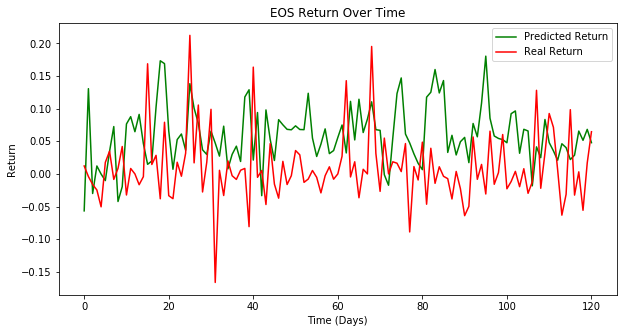

In [7]:
#EOS
y_predict, real_y_test, real_y_predict, fig,real_y_daybefore =test_model(model_32, X_test, Y_test)

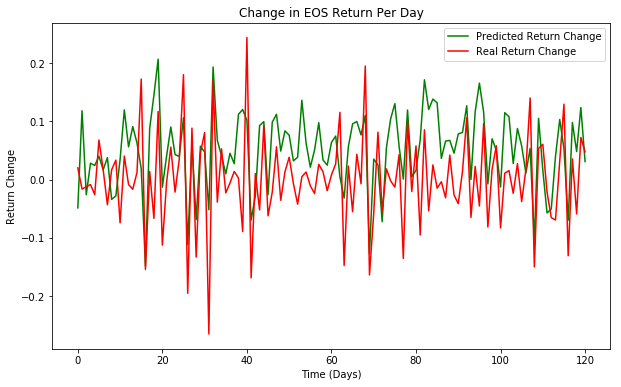

In [8]:
return_change_predict, return_change_real, fig_2 = return_change(real_y_daybefore, real_y_test, real_y_predict)

In [9]:
return_change_predict_1_0, return_change_real_1_0 = binary_return(return_change_predict,return_change_real)


true positive is 58
true negative is 17
false negative is 4
false positive is 42
precision rate is 0.58
accuracy rate is 0.6198
recall rate is 0.9355
F1 Score is 0.716
[4.64285977e-03 8.25175337e-03 4.31066304e-03 3.69644043e-03
 1.24100534e-02 3.06852749e-03 4.67837145e-03 3.29191000e-03
 6.17579041e-03 3.41573760e-03 2.78646577e-03 1.57251072e-02
 2.83456666e-03 1.11680590e-02 4.32936407e-03 1.88237360e-02
 5.29559133e-03 1.94672679e-02 2.14271465e-02 2.29677499e-04
 8.95661442e-03 2.17036397e-02 1.10638007e-02 4.25144023e-03
 6.66784227e-03 2.10099872e-02 3.40260909e-03 3.56499143e-03
 3.05413487e-04 4.08100937e-03 5.24652313e-03 8.90430701e-03
 3.22069220e-03 1.91385149e-02 1.54743831e-02 1.18875494e-02
 1.82292080e-02 7.54340443e-03 2.87830026e-02 1.05862548e-02
 1.60426492e-02 1.16238629e-02 7.23772785e-03 5.46651763e-03
 1.31299913e-02 1.62128822e-02 1.08835876e-02 2.35310397e-02
 1.43545679e-02 1.32998236e-02 1.26348491e-02 1.17950004e-02
 1.84789591e-02 8.17997911e-03 8.084725

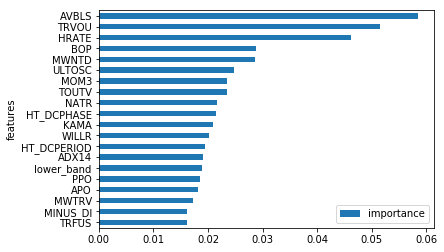

In [10]:
true_pos, false_pos, true_neg, false_neg =  find_positives_negatives(return_change_predict_1_0, return_change_real_1_0)

print('true positive is',true_pos)
print('true negative is',true_neg)
print('false negative is',false_neg)
print('false positive is',false_pos)

precision = float(true_pos) / (true_pos + false_pos)
accuracy = float(true_pos+true_neg)/ (true_pos+true_neg+false_neg+false_pos)
recall=float(true_pos)/(true_pos+false_neg)
F1_score=2* (precision*recall)/(precision+recall)

print('precision rate is',round(precision,4))
print('accuracy rate is',round(accuracy,4))
print('recall rate is', round(recall,4))
print('F1 Score is',round(F1_score,4))

#feature importance
from keras.wrappers.scikit_learn import KerasRegressor
feature_importance = KerasRegressor(build_fn=model, epochs=100, batch_size=32)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_total_scaled = sc.fit_transform(dataset_total)

X_normal=dataset_total_scaled[:,:-1]
Y=dataset_total_scaled[:,-1]

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_normal, Y)

# show importance scores
print(model.feature_importances_)

import matplotlib.pyplot as plt
# plot importance scores
names = dataset_total.columns.values[:-1]
names = names.reshape(len(names),1)
importance= model.feature_importances_
importance =importance.reshape(len(importance),1)
print(names)
print(importance)

features= pd.DataFrame(names)
features['importance']=importance
features.columns=['features','importance'] 
graph=features.sort_values(by=['importance']).tail(20)
np.array(graph['importance']).shape
graph.info()
graph.plot.barh(x='features', y='importance')

In [11]:
# %load NN3
#!/usr/bin/env python

# In[1]:


import numpy as np
import talib
import pandas as pd
import os
import talib as ta
import time
import datetime

## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#for logging
import time

##matrix math
import math

##plotting
import matplotlib.pyplot as plt
from sklearn import preprocessing


# In[1]:


def load_data(filename):
#Read the data file
    dataset_total = pd.read_csv(filename,na_values='n/a',parse_dates=['Date'],index_col='Date')
    dataset_total=dataset_total.drop(['Unnamed: 0',], axis=1)
    dataset_total= dataset_total.loc[:, (dataset_total!= 0).any(axis=0)]

    #normalize dataset
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_total_scaled = sc.fit_transform(dataset_total)
    X_normal=dataset_total_scaled[:,:-1]
    Y=dataset_total_scaled[:,-1]
    
    #Splitting data set into training (First 80% of data points) and testing data (last 20% of data points)
    split_line = round(0.8 * X_normal.shape[0])
    X_train = X_normal[:int(split_line), :]
    Y_train = Y[:int(split_line)]
    X_test = X_normal[int(split_line):,:]
    Y_test = Y[int(split_line):]
    Y_daybefore = Y[int(split_line)-1:-1]

    #shuffle the training set and test set
    #X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y, test_size=0.2, random_state=37)
    return X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore


# In[2]:


def initialize_model(dropout_rate):
    """
    Initializes and creates the model to be used
    
    Arguments:
    dropout_rate -- A decimal representing how much dropout should be incorporated at each level, in this case 0.2
    activation_function -- A string to define the activation_function, in this case it is linear
    loss_function -- A string to define the loss function to be used, in the case it is mean squared error
    optimizer -- A string to define the optimizer to be used, in the case it is adam
    
    Returns:
    model -- A 3 layer RNN with 100*dropout_value dropout in each layer that uses activation_function as its activation
             function, loss_function as its loss function, and optimizer as its optimizer
    """
  
    #Build the model
    model=Sequential()
    
   
    optimizer='adam'
    loss='mean_squared_error'
    activation='relu'
    input_shape = (X_train.shape[1],)
    model.add(Dense(units = 64,activation=activation, input_shape = input_shape))
    model.add(Dense(units = 64, activation=activation))
    model.add(Dense(units = 32, activation=activation))
    model.add(Dense(units = 1,activation='relu'))
   
    
              
    model.compile(optimizer =optimizer, loss = loss, metrics=['mse'])

    
    return model


# In[3]:


#Training the model

def fit_model(model, X_train, Y_train, batch_num, num_epoch, val_split):
    """
    Fits the model to the training data
    
    Arguments:
    model -- The previously initalized 3 layer Recurrent Neural Network
    X_train -- A tensor of shape (2492, 30, 105) that represents the x values of the training data
    Y_train -- A tensor of shape (2492,) that represents the y values of the training data
    batch_num -- An integer representing the batch size to be used, in this case 100
    num_epoch -- An integer defining the number of epochs to be run, in this case 100
    val_split -- A decimal representing the proportion of training data to be used as validation data
    
    Returns:
    model -- The 3 layer Recurrent Neural Network that has been fitted to the training data
    training_time -- An integer representing the amount of time (in seconds) that the model was training
    """
   

    #Train the model on X_train and Y_train
    history=model.fit(X_train, Y_train, batch_size= batch_num, nb_epoch=num_epoch, validation_split= val_split)

    return model,history


# In[5]:





# In[4]:


# test the model
def test_model(model_name, X_test, Y_test):
    """
    Test the model on the testing data
    
    Arguments:
    model -- The previously fitted 3 layer Recurrent Neural Network
    X_test -- A tensor of shape (623, 30, 105) that represents the x values of the testing data
    Y_test -- A tensor of shape (623,) that represents the y values of the testing data
    unnormalized_bases -- A tensor of shape (623,) that can be used to get unnormalized data points
    
    Returns:
    y_predict -- A tensor of shape (623,) that represnts the normalized values that the model predicts based on X_test
    real_y_test -- A tensor of shape (623,) that represents the actual prices of bitcoin throughout the testing period
    real_y_predict -- A tensor of shape (623,) that represents the model's predicted prices of bitcoin
    fig -- A branch of the graph of the real predicted prices of bitcoin versus the real prices of bitcoin
    """
    #Test the model on X_Test
    Y_norm = model_name.predict(X_test)
    
    # normalize predicted y
    Y_original=dataset_total.iloc[:,-1]
    Y_max=Y_original.max()
    Y_min=Y_original.min()
    real_y_predict = Y_norm *(Y_max-Y_min)+Y_min
    
    # normalize Y_test
    real_y_test = Y_test *(Y_max-Y_min)+Y_min
    
    # normalize real Y_daybefore
    real_y_daybefore = Y_daybefore * (Y_max-Y_min)+Y_min

    #Plot of the predicted prices versus the real prices
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("ETH Return Over Time")
    plt.plot(real_y_predict, color = 'green', label = 'Predicted Return')
    plt.plot(real_y_test, color = 'red', label = 'Real Return')
    ax.set_ylabel("Return")
    ax.set_xlabel("Time (Days)")
    ax.legend()
    
    return Y_norm, real_y_test, real_y_predict, fig, real_y_daybefore


# In[5]:


#evaluate change in return

def return_change(real_y_daybefore, real_y_test, real_y_predict):
    """
    Calculate the percent change between each value and the day before
    
    Arguments:
    real_y_daybefore -- A tensor of shape (623,) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (623,) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (623,) that represents the normalized y values of the model's predictions
    
    Returns:
    delta_predict -- A tensor of shape (623, ) that represents the difference between predicted and day before values
    delta_real -- A tensor of shape (623, ) that represents the difference between real and day before values
    fig -- A plot representing percent change in bitcoin price per day,
    """
    return_change_real = real_y_test - real_y_daybefore
    real_y_predict_reshape= np.reshape(real_y_predict,(real_y_predict.shape[0],))
    return_change_predict = real_y_predict_reshape - real_y_daybefore

    fig_2 = plt.figure(figsize=(10, 6))
    ax = fig_2.add_subplot(111)
    ax.set_title("Change in ETH Return Per Day")
    plt.plot(return_change_predict, color='green', label = 'Predicted Return Change')
    plt.plot(return_change_real, color='red', label = 'Real Return Change')
    plt.ylabel("Return Change")
    plt.xlabel("Time (Days)")
    ax.legend()
    plt.show()
    return  return_change_predict, return_change_real, fig_2


# In[8]:


def binary_return(return_change_predict,return_change_real):
    """
    Converts return change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    Arguments:
    delta_predict -- A tensor of shape (623, 1) that represents the predicted percent change in price
    delta_real -- A tensor of shape (623, 1) that represents the real percent change in price
    
    Returns:
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    return_change_predict_1_0 = np.empty(return_change_predict.shape)
    return_change_real_1_0 = np.empty(return_change_real.shape)

    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(return_change_predict.shape[0]):
        if return_change_predict[i] > 0:
            return_change_predict_1_0[i] = 1
        else:
            return_change_predict_1_0[i] = 0
  
    for i in range(return_change_real.shape[0]):
        if  return_change_real[i] > 0:
            return_change_real_1_0[i] = 1
        else:
            return_change_real_1_0[i] = 0
    return return_change_predict_1_0, return_change_real_1_0



# In[6]:


def find_positives_negatives(return_change_predict_1_0, return_change_real_1_0):
    """
    Finding the number of false positives, false negatives, true positives, true negatives
    
    Arguments: 
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    
    Returns:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    """
    #Finding the number of false positive/negatives and true positives/negatives
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(return_change_real_1_0.shape[0]):
        real = return_change_real_1_0[i]
        predicted = return_change_predict_1_0[i]
        if real == 1:
            if predicted == 1:
                true_pos += 1
            else:
                false_neg += 1
        elif real == 0:
            if predicted == 0:
                true_neg += 1
            else:
                false_pos += 1
    return true_pos, false_pos, true_neg, false_neg


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:






In [12]:
#ETH
#Load the data
X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore = load_data("merge_ETH-USD.csv")
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

#initialize the model
model= initialize_model(0.2)
print (model.summary())

#fit the model
model,history = fit_model(model, X_train, Y_train, 32, 100, .3)



(1038, 110)
(1038,)
(260, 110)
(260,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                7104      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 13,377
Trainable params: 13,377
Non-trainable params: 0
_________________________________________________________________
None


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 726 samples, validate on 312 samples
Epoch 1/100
726/726 [==============================] - 0s 367us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 2/100
726/726 [==============================] - 0s 43us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 3/100
726/726 [==============================] - 0s 47us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 4/100
726/726 [==============================] - 0s 44us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 5/100
726/726 [==============================] - 0s 40us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 6/100
726/726 [==============================] - 0s 37us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0069 - 

726/726 [==============================] - 0s 36us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 51/100
726/726 [==============================] - 0s 34us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 52/100
726/726 [==============================] - 0s 34us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 53/100
726/726 [==============================] - 0s 33us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 54/100
726/726 [==============================] - 0s 40us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 55/100
726/726 [==============================] - 0s 40us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 56/100
726/726 [=

Epoch 100/100
726/726 [==============================] - 0s 36us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0420 - val_mean_squared_error: 0.0420


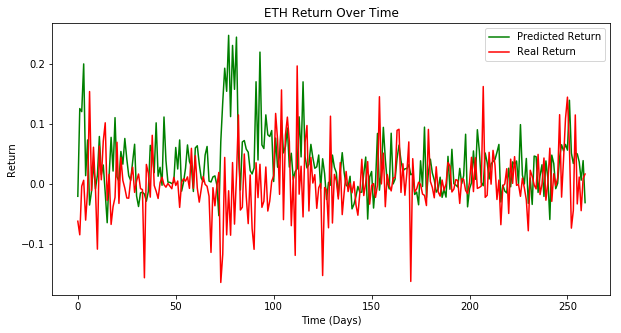

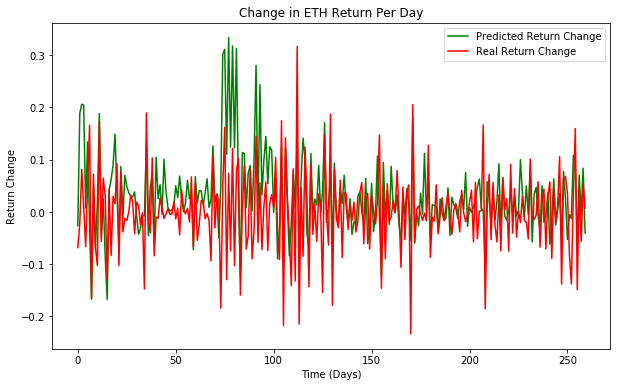

true positive is 106
true negative is 63
false negative is 27
false positive is 64
precision rate is 0.6235
accuracy rate is 0.65
recall rate is 0.797
F1 Score is 0.6997
[4.03021083e-03 6.55003324e-03 5.09222583e-03 3.30080433e-03
 1.28313696e-02 3.58958366e-03 3.29693812e-03 5.41744432e-03
 3.24877503e-03 3.18926127e-03 2.99572200e-03 9.25653406e-03
 3.31842092e-03 7.69722035e-03 4.43074336e-03 1.19632318e-02
 7.53538399e-03 2.36999315e-02 2.96161038e-02 4.24003342e-04
 5.95834138e-03 4.96623875e-02 1.10201377e-02 4.13301640e-03
 7.71216858e-03 4.05805017e-03 3.22260721e-03 2.13158021e-03
 0.00000000e+00 2.69561636e-03 2.68910973e-03 6.09399854e-03
 2.89558982e-03 1.41202525e-02 1.55119269e-02 1.69184392e-02
 1.11851566e-02 1.60709032e-02 3.65383068e-02 1.00495550e-02
 1.42486340e-02 1.63762871e-02 2.20736755e-02 8.11725425e-03
 1.56297263e-02 2.32804423e-02 1.25975161e-02 1.33629364e-02
 1.34356581e-02 1.07197146e-02 2.97262539e-02 6.95885959e-03
 2.37932155e-02 1.31857961e-02 1.3407

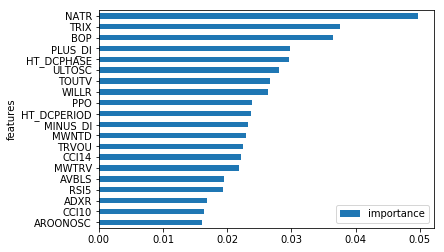

In [13]:
#test the model
y_predict, real_y_test, real_y_predict, fig,real_y_daybefore =test_model(model, X_test, Y_test)

#plot the return change per day
return_change_predict, return_change_real, fig_2 = return_change(real_y_daybefore, real_y_test, real_y_predict)

return_change_predict_1_0, return_change_real_1_0 = binary_return(return_change_predict,return_change_real)

#calculate confusion matrix statistics
true_pos, false_pos, true_neg, false_neg =  find_positives_negatives(return_change_predict_1_0, return_change_real_1_0)

print('true positive is',true_pos)
print('true negative is',true_neg)
print('false negative is',false_neg)
print('false positive is',false_pos)

precision = float(true_pos) / (true_pos + false_pos)
accuracy = float(true_pos+true_neg)/ (true_pos+true_neg+false_neg+false_pos)
recall=float(true_pos)/(true_pos+false_neg)
F1_score=2* (precision*recall)/(precision+recall)

print('precision rate is',round(precision,4))
print('accuracy rate is',round(accuracy,4))
print('recall rate is', round(recall,4))
print('F1 Score is',round(F1_score,4))

#feature importance
from keras.wrappers.scikit_learn import KerasRegressor
feature_importance = KerasRegressor(build_fn=model, epochs=100, batch_size=32)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_total_scaled = sc.fit_transform(dataset_total)

X_normal=dataset_total_scaled[:,:-1]
Y=dataset_total_scaled[:,-1]

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_normal, Y)

# show importance scores
print(model.feature_importances_)

import matplotlib.pyplot as plt
# plot importance scores
names = dataset_total.columns.values[:-1]
names = names.reshape(len(names),1)
importance= model.feature_importances_
importance =importance.reshape(len(importance),1)
print(names)
print(importance)

features= pd.DataFrame(names)
features['importance']=importance
features.columns=['features','importance'] 
graph=features.sort_values(by=['importance']).tail(20)
np.array(graph['importance']).shape
graph.info()
graph.plot.barh(x='features', y='importance')

In [20]:
# %load NN3
#!/usr/bin/env python

# In[1]:


import numpy as np
import talib
import pandas as pd
import os
import talib as ta
import time
import datetime

## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#for logging
import time

##matrix math
import math

##plotting
import matplotlib.pyplot as plt
from sklearn import preprocessing


# In[1]:


def load_data(filename,percent):
#Read the data file
    dataset_total = pd.read_csv(filename,na_values='n/a',parse_dates=['Date'],index_col='Date')
    dataset_total=dataset_total.drop(['Unnamed: 0',], axis=1)
    dataset_total= dataset_total.loc[:, (dataset_total!= 0).any(axis=0)]

    #normalize dataset
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_total_scaled = sc.fit_transform(dataset_total)
    X_normal=dataset_total_scaled[:,:-1]
    Y=dataset_total_scaled[:,-1]
    
    #Splitting data set into training (First 80% of data points) and testing data (last 20% of data points)
    split_line = round(percent* X_normal.shape[0])
    X_train = X_normal[:int(split_line), :]
    Y_train = Y[:int(split_line)]
    X_test = X_normal[int(split_line):,:]
    Y_test = Y[int(split_line):]
    Y_daybefore = Y[int(split_line)-1:-1]

    #shuffle the training set and test set
    #X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y, test_size=0.2, random_state=37)
    return X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore


# In[2]:


def initialize_model(dropout_rate):
    """
    Initializes and creates the model to be used
    
    Arguments:
    dropout_rate -- A decimal representing how much dropout should be incorporated at each level, in this case 0.2
    activation_function -- A string to define the activation_function, in this case it is linear
    loss_function -- A string to define the loss function to be used, in the case it is mean squared error
    optimizer -- A string to define the optimizer to be used, in the case it is adam
    
    Returns:
    model -- A 3 layer RNN with 100*dropout_value dropout in each layer that uses activation_function as its activation
             function, loss_function as its loss function, and optimizer as its optimizer
    """
  
    #Build the model
    model=Sequential()
    
   
    optimizer='adam'
    loss='mean_squared_error'
    activation='relu'
    input_shape = (X_train.shape[1],)
    model.add(Dense(units = 64,activation=activation, input_shape = input_shape))
    model.add(Dense(units = 64, activation=activation))
    model.add(Dense(units = 32, activation=activation))
    model.add(Dense(units = 1,activation='relu'))
   
    
              
    model.compile(optimizer =optimizer, loss = loss, metrics=['mse'])

    
    return model


# In[3]:


#Training the model

def fit_model(model, X_train, Y_train, batch_num, num_epoch, val_split):
    """
    Fits the model to the training data
    
    Arguments:
    model -- The previously initalized 3 layer Recurrent Neural Network
    X_train -- A tensor of shape (2492, 30, 105) that represents the x values of the training data
    Y_train -- A tensor of shape (2492,) that represents the y values of the training data
    batch_num -- An integer representing the batch size to be used, in this case 100
    num_epoch -- An integer defining the number of epochs to be run, in this case 100
    val_split -- A decimal representing the proportion of training data to be used as validation data
    
    Returns:
    model -- The 3 layer Recurrent Neural Network that has been fitted to the training data
    training_time -- An integer representing the amount of time (in seconds) that the model was training
    """
   

    #Train the model on X_train and Y_train
    history=model.fit(X_train, Y_train, batch_size= batch_num, nb_epoch=num_epoch, validation_split= val_split)

    return model,history


# In[5]:





# In[4]:


# test the model
def test_model(model_name, X_test, Y_test):
    """
    Test the model on the testing data
    
    Arguments:
    model -- The previously fitted 3 layer Recurrent Neural Network
    X_test -- A tensor of shape (623, 30, 105) that represents the x values of the testing data
    Y_test -- A tensor of shape (623,) that represents the y values of the testing data
    unnormalized_bases -- A tensor of shape (623,) that can be used to get unnormalized data points
    
    Returns:
    y_predict -- A tensor of shape (623,) that represnts the normalized values that the model predicts based on X_test
    real_y_test -- A tensor of shape (623,) that represents the actual prices of bitcoin throughout the testing period
    real_y_predict -- A tensor of shape (623,) that represents the model's predicted prices of bitcoin
    fig -- A branch of the graph of the real predicted prices of bitcoin versus the real prices of bitcoin
    """
    #Test the model on X_Test
    Y_norm = model_name.predict(X_test)
    
    # normalize predicted y
    Y_original=dataset_total.iloc[:,-1]
    Y_max=Y_original.max()
    Y_min=Y_original.min()
    real_y_predict = Y_norm *(Y_max-Y_min)+Y_min
    
    # normalize Y_test
    real_y_test = Y_test *(Y_max-Y_min)+Y_min
    
    # normalize real Y_daybefore
    real_y_daybefore = Y_daybefore * (Y_max-Y_min)+Y_min

    #Plot of the predicted prices versus the real prices
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("LTC Return Over Time")
    plt.plot(real_y_predict, color = 'green', label = 'Predicted Return')
    plt.plot(real_y_test, color = 'red', label = 'Real Return')
    ax.set_ylabel("Return")
    ax.set_xlabel("Time (Days)")
    ax.legend()
    
    return Y_norm, real_y_test, real_y_predict, fig, real_y_daybefore


# In[5]:


#evaluate change in return

def return_change(real_y_daybefore, real_y_test, real_y_predict):
    """
    Calculate the percent change between each value and the day before
    
    Arguments:
    real_y_daybefore -- A tensor of shape (623,) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (623,) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (623,) that represents the normalized y values of the model's predictions
    
    Returns:
    delta_predict -- A tensor of shape (623, ) that represents the difference between predicted and day before values
    delta_real -- A tensor of shape (623, ) that represents the difference between real and day before values
    fig -- A plot representing percent change in bitcoin price per day,
    """
    return_change_real = real_y_test - real_y_daybefore
    real_y_predict_reshape= np.reshape(real_y_predict,(real_y_predict.shape[0],))
    return_change_predict = real_y_predict_reshape - real_y_daybefore

    fig_2 = plt.figure(figsize=(10, 6))
    ax = fig_2.add_subplot(111)
    ax.set_title("Change in LTC Return Per Day")
    plt.plot(return_change_predict, color='green', label = 'Predicted Return Change')
    plt.plot(return_change_real, color='red', label = 'Real Return Change')
    plt.ylabel("Return Change")
    plt.xlabel("Time (Days)")
    ax.legend()
    plt.show()
    return  return_change_predict, return_change_real, fig_2


# In[8]:


def binary_return(return_change_predict,return_change_real):
    """
    Converts return change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    Arguments:
    delta_predict -- A tensor of shape (623, 1) that represents the predicted percent change in price
    delta_real -- A tensor of shape (623, 1) that represents the real percent change in price
    
    Returns:
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    return_change_predict_1_0 = np.empty(return_change_predict.shape)
    return_change_real_1_0 = np.empty(return_change_real.shape)

    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(return_change_predict.shape[0]):
        if return_change_predict[i] > 0:
            return_change_predict_1_0[i] = 1
        else:
            return_change_predict_1_0[i] = 0
  
    for i in range(return_change_real.shape[0]):
        if  return_change_real[i] > 0:
            return_change_real_1_0[i] = 1
        else:
            return_change_real_1_0[i] = 0
    return return_change_predict_1_0, return_change_real_1_0



# In[6]:


def find_positives_negatives(return_change_predict_1_0, return_change_real_1_0):
    """
    Finding the number of false positives, false negatives, true positives, true negatives
    
    Arguments: 
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    
    Returns:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    """
    #Finding the number of false positive/negatives and true positives/negatives
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(return_change_real_1_0.shape[0]):
        real = return_change_real_1_0[i]
        predicted = return_change_predict_1_0[i]
        if real == 1:
            if predicted == 1:
                true_pos += 1
            else:
                false_neg += 1
        elif real == 0:
            if predicted == 0:
                true_neg += 1
            else:
                false_pos += 1
    return true_pos, false_pos, true_neg, false_neg


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:






In [21]:
#LTC
#Load the data
X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore = load_data("merge_LTC-USD.csv",0.9)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

#initialize the model
model= initialize_model(0.2)
print (model.summary())

#fit the model
model,history = fit_model(model, X_train, Y_train, 32, 100, .2)

(1755, 108)
(1755,)
(195, 108)
(195,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                6976      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
_________________________________________________________________
None


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1404 samples, validate on 351 samples
Epoch 1/100
1404/1404 [==============================] - 0s 287us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 2/100
1404/1404 [==============================] - 0s 36us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3/100
1404/1404 [==============================] - 0s 41us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/100
1404/1404 [==============================] - 0s 33us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/100
1404/1404 [==============================] - 0s 35us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/100
1404/1404 [==============================] - 0s 33us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_lo

1404/1404 [==============================] - 0s 33us/step - loss: 6.9848e-04 - mean_squared_error: 6.9848e-04 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 49/100
1404/1404 [==============================] - 0s 36us/step - loss: 7.1939e-04 - mean_squared_error: 7.1939e-04 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 50/100
1404/1404 [==============================] - 0s 32us/step - loss: 6.7360e-04 - mean_squared_error: 6.7360e-04 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 51/100
1404/1404 [==============================] - 0s 36us/step - loss: 6.3659e-04 - mean_squared_error: 6.3659e-04 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 52/100
1404/1404 [==============================] - 0s 33us/step - loss: 6.3041e-04 - mean_squared_error: 6.3041e-04 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 53/100
1404/1404 [==============================] - 0s 33us/step - loss: 6.2927e-04 - mean_squared_error: 6.2927e-04 - val_loss: 0.0

1404/1404 [==============================] - 0s 33us/step - loss: 5.1385e-04 - mean_squared_error: 5.1385e-04 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 95/100
1404/1404 [==============================] - 0s 29us/step - loss: 5.4907e-04 - mean_squared_error: 5.4907e-04 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 96/100
1404/1404 [==============================] - 0s 31us/step - loss: 4.8476e-04 - mean_squared_error: 4.8476e-04 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 97/100
1404/1404 [==============================] - 0s 30us/step - loss: 4.9711e-04 - mean_squared_error: 4.9711e-04 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 98/100
1404/1404 [==============================] - 0s 33us/step - loss: 5.1604e-04 - mean_squared_error: 5.1604e-04 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 99/100
1404/1404 [==============================] - 0s 32us/step - loss: 4.7540e-04 - mean_squared_error: 4.7540e-04 - val_loss: 0.0

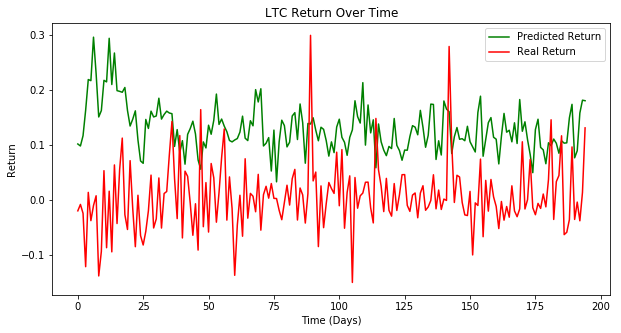

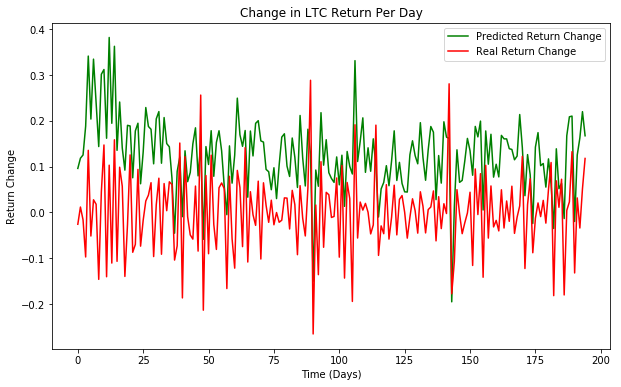

true positive is 101
true negative is 11
false negative is 0
false positive is 83
precision rate is 0.5489
accuracy rate is 0.5744
recall rate is 1.0
F1 Score is 0.7088
[4.26863511e-03 3.43092555e-03 3.34620917e-03 2.80566257e-03
 9.54285504e-03 2.15467234e-03 3.35274320e-03 2.58539090e-03
 2.93410645e-03 3.07220958e-03 2.80492716e-03 1.56556014e-02
 2.66152656e-03 8.98352203e-03 4.54029200e-03 1.02576434e-02
 1.15952462e-02 4.73657421e-02 1.72343782e-02 6.14387105e-04
 1.30899002e-02 2.26030759e-02 1.29709874e-02 9.96163720e-03
 3.18617336e-03 2.96632500e-03 2.53490351e-03 3.62532949e-03
 2.15963095e-04 5.30699296e-03 2.69046377e-03 3.34474170e-03
 3.06768560e-03 1.03940036e-02 1.01400618e-02 1.24645927e-02
 1.07644222e-02 1.22601595e-02 1.42768273e-02 6.14302523e-03
 1.19829982e-02 8.39974237e-03 8.37265532e-03 9.70405588e-03
 1.03103101e-02 1.35673872e-02 7.90015539e-03 2.21800671e-02
 1.40649580e-02 9.14680032e-03 1.30854842e-02 8.33494172e-03
 2.08333570e-02 5.83661143e-02 5.27758

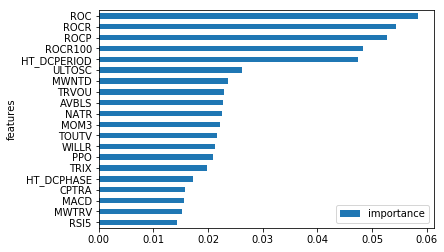

In [22]:
#test the model
y_predict, real_y_test, real_y_predict, fig,real_y_daybefore =test_model(model, X_test, Y_test)

#plot the return change per day
return_change_predict, return_change_real, fig_2 = return_change(real_y_daybefore, real_y_test, real_y_predict)

return_change_predict_1_0, return_change_real_1_0 = binary_return(return_change_predict,return_change_real)

#calculate confusion matrix statistics
true_pos, false_pos, true_neg, false_neg =  find_positives_negatives(return_change_predict_1_0, return_change_real_1_0)

print('true positive is',true_pos)
print('true negative is',true_neg)
print('false negative is',false_neg)
print('false positive is',false_pos)

precision = float(true_pos) / (true_pos + false_pos)
accuracy = float(true_pos+true_neg)/ (true_pos+true_neg+false_neg+false_pos)
recall=float(true_pos)/(true_pos+false_neg)
F1_score=2* (precision*recall)/(precision+recall)

print('precision rate is',round(precision,4))
print('accuracy rate is',round(accuracy,4))
print('recall rate is', round(recall,4))
print('F1 Score is',round(F1_score,4))

#feature importance
from keras.wrappers.scikit_learn import KerasRegressor
feature_importance = KerasRegressor(build_fn=model, epochs=100, batch_size=32)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_total_scaled = sc.fit_transform(dataset_total)

X_normal=dataset_total_scaled[:,:-1]
Y=dataset_total_scaled[:,-1]

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_normal, Y)

# show importance scores
print(model.feature_importances_)

import matplotlib.pyplot as plt
# plot importance scores
names = dataset_total.columns.values[:-1]
names = names.reshape(len(names),1)
importance= model.feature_importances_
importance =importance.reshape(len(importance),1)
print(names)
print(importance)

features= pd.DataFrame(names)
features['importance']=importance
features.columns=['features','importance'] 
graph=features.sort_values(by=['importance']).tail(20)
np.array(graph['importance']).shape
graph.info()
graph.plot.barh(x='features', y='importance')

In [27]:
# %load NN3
#!/usr/bin/env python

# In[1]:


import numpy as np
import talib
import pandas as pd
import os
import talib as ta
import time
import datetime

## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#for logging
import time

##matrix math
import math

##plotting
import matplotlib.pyplot as plt
from sklearn import preprocessing


# In[1]:


def load_data(filename):
#Read the data file
    dataset_total = pd.read_csv(filename,na_values='n/a',parse_dates=['Date'],index_col='Date')
    dataset_total=dataset_total.drop(['Unnamed: 0',], axis=1)
    dataset_total= dataset_total.loc[:, (dataset_total!= 0).any(axis=0)]

    #normalize dataset
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_total_scaled = sc.fit_transform(dataset_total)
    X_normal=dataset_total_scaled[:,:-1]
    Y=dataset_total_scaled[:,-1]
    
    #Splitting data set into training (First 80% of data points) and testing data (last 20% of data points)
    split_line = round(0.8 * X_normal.shape[0])
    X_train = X_normal[:int(split_line), :]
    Y_train = Y[:int(split_line)]
    X_test = X_normal[int(split_line):,:]
    Y_test = Y[int(split_line):]
    Y_daybefore = Y[int(split_line)-1:-1]

    #shuffle the training set and test set
    #X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y, test_size=0.2, random_state=37)
    return X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore


# In[2]:


def initialize_model(dropout_rate):
    """
    Initializes and creates the model to be used
    
    Arguments:
    dropout_rate -- A decimal representing how much dropout should be incorporated at each level, in this case 0.2
    activation_function -- A string to define the activation_function, in this case it is linear
    loss_function -- A string to define the loss function to be used, in the case it is mean squared error
    optimizer -- A string to define the optimizer to be used, in the case it is adam
    
    Returns:
    model -- A 3 layer RNN with 100*dropout_value dropout in each layer that uses activation_function as its activation
             function, loss_function as its loss function, and optimizer as its optimizer
    """
  
    #Build the model
    model=Sequential()
    
   
    optimizer='adam'
    loss='mean_squared_error'
    activation='relu'
    input_shape = (X_train.shape[1],)
    model.add(Dense(units = 64,activation=activation, input_shape = input_shape))
    model.add(Dense(units = 64, activation=activation))
    model.add(Dense(units = 32, activation=activation))
    model.add(Dense(units = 1,activation='relu'))
   
    
              
    model.compile(optimizer =optimizer, loss = loss, metrics=['mse'])

    
    return model


# In[3]:


#Training the model

def fit_model(model, X_train, Y_train, batch_num, num_epoch, val_split):
    """
    Fits the model to the training data
    
    Arguments:
    model -- The previously initalized 3 layer Recurrent Neural Network
    X_train -- A tensor of shape (2492, 30, 105) that represents the x values of the training data
    Y_train -- A tensor of shape (2492,) that represents the y values of the training data
    batch_num -- An integer representing the batch size to be used, in this case 100
    num_epoch -- An integer defining the number of epochs to be run, in this case 100
    val_split -- A decimal representing the proportion of training data to be used as validation data
    
    Returns:
    model -- The 3 layer Recurrent Neural Network that has been fitted to the training data
    training_time -- An integer representing the amount of time (in seconds) that the model was training
    """
   

    #Train the model on X_train and Y_train
    history=model.fit(X_train, Y_train, batch_size= batch_num, nb_epoch=num_epoch, validation_split= val_split)

    return model,history


# In[5]:





# In[4]:


# test the model
def test_model(model_name, X_test, Y_test):
    """
    Test the model on the testing data
    
    Arguments:
    model -- The previously fitted 3 layer Recurrent Neural Network
    X_test -- A tensor of shape (623, 30, 105) that represents the x values of the testing data
    Y_test -- A tensor of shape (623,) that represents the y values of the testing data
    unnormalized_bases -- A tensor of shape (623,) that can be used to get unnormalized data points
    
    Returns:
    y_predict -- A tensor of shape (623,) that represnts the normalized values that the model predicts based on X_test
    real_y_test -- A tensor of shape (623,) that represents the actual prices of bitcoin throughout the testing period
    real_y_predict -- A tensor of shape (623,) that represents the model's predicted prices of bitcoin
    fig -- A branch of the graph of the real predicted prices of bitcoin versus the real prices of bitcoin
    """
    #Test the model on X_Test
    Y_norm = model_name.predict(X_test)
    
    # normalize predicted y
    Y_original=dataset_total.iloc[:,-1]
    Y_max=Y_original.max()
    Y_min=Y_original.min()
    real_y_predict = Y_norm *(Y_max-Y_min)+Y_min
    
    # normalize Y_test
    real_y_test = Y_test *(Y_max-Y_min)+Y_min
    
    # normalize real Y_daybefore
    real_y_daybefore = Y_daybefore * (Y_max-Y_min)+Y_min

    #Plot of the predicted prices versus the real prices
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("ZEC Return Over Time")
    plt.plot(real_y_predict, color = 'green', label = 'Predicted Return')
    plt.plot(real_y_test, color = 'red', label = 'Real Return')
    ax.set_ylabel("Return")
    ax.set_xlabel("Time (Days)")
    ax.legend()
    
    return Y_norm, real_y_test, real_y_predict, fig, real_y_daybefore


# In[5]:


#evaluate change in return

def return_change(real_y_daybefore, real_y_test, real_y_predict):
    """
    Calculate the percent change between each value and the day before
    
    Arguments:
    real_y_daybefore -- A tensor of shape (623,) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (623,) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (623,) that represents the normalized y values of the model's predictions
    
    Returns:
    delta_predict -- A tensor of shape (623, ) that represents the difference between predicted and day before values
    delta_real -- A tensor of shape (623, ) that represents the difference between real and day before values
    fig -- A plot representing percent change in bitcoin price per day,
    """
    return_change_real = real_y_test - real_y_daybefore
    real_y_predict_reshape= np.reshape(real_y_predict,(real_y_predict.shape[0],))
    return_change_predict = real_y_predict_reshape - real_y_daybefore

    fig_2 = plt.figure(figsize=(10, 6))
    ax = fig_2.add_subplot(111)
    ax.set_title("Change in ZEC Return Per Day")
    plt.plot(return_change_predict, color='green', label = 'Predicted Return Change')
    plt.plot(return_change_real, color='red', label = 'Real Return Change')
    plt.ylabel("Return Change")
    plt.xlabel("Time (Days)")
    ax.legend()
    plt.show()
    return  return_change_predict, return_change_real, fig_2


# In[8]:


def binary_return(return_change_predict,return_change_real):
    """
    Converts return change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    Arguments:
    delta_predict -- A tensor of shape (623, 1) that represents the predicted percent change in price
    delta_real -- A tensor of shape (623, 1) that represents the real percent change in price
    
    Returns:
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    return_change_predict_1_0 = np.empty(return_change_predict.shape)
    return_change_real_1_0 = np.empty(return_change_real.shape)

    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(return_change_predict.shape[0]):
        if return_change_predict[i] > 0:
            return_change_predict_1_0[i] = 1
        else:
            return_change_predict_1_0[i] = 0
  
    for i in range(return_change_real.shape[0]):
        if  return_change_real[i] > 0:
            return_change_real_1_0[i] = 1
        else:
            return_change_real_1_0[i] = 0
    return return_change_predict_1_0, return_change_real_1_0



# In[6]:


def find_positives_negatives(return_change_predict_1_0, return_change_real_1_0):
    """
    Finding the number of false positives, false negatives, true positives, true negatives
    
    Arguments: 
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    
    Returns:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    """
    #Finding the number of false positive/negatives and true positives/negatives
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(return_change_real_1_0.shape[0]):
        real = return_change_real_1_0[i]
        predicted = return_change_predict_1_0[i]
        if real == 1:
            if predicted == 1:
                true_pos += 1
            else:
                false_neg += 1
        elif real == 0:
            if predicted == 0:
                true_neg += 1
            else:
                false_pos += 1
    return true_pos, false_pos, true_neg, false_neg


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:






In [28]:
#ZEC
#Load the data
X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore = load_data("merge_ZEC-USD.csv")
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

#initialize the model
model= initialize_model(0.2)
print (model.summary())

#fit the model
model,history = fit_model(model, X_train, Y_train, 32, 100, .2)

(680, 112)
(680,)
(170, 112)
(170,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                7232      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 13,505
Trainable params: 13,505
Non-trainable params: 0
_________________________________________________________________
None


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 544 samples, validate on 136 samples
Epoch 1/100
544/544 [==============================] - 0s 808us/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2/100
544/544 [==============================] - 0s 44us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 3/100
544/544 [==============================] - 0s 40us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 4/100
544/544 [==============================] - 0s 44us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 5/100
544/544 [==============================] - 0s 44us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 6/100
544/544 [==============================] - 0s 44us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0051 - 

544/544 [==============================] - 0s 42us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 51/100
544/544 [==============================] - 0s 40us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 52/100
544/544 [==============================] - 0s 48us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 53/100
544/544 [==============================] - 0s 42us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 54/100
544/544 [==============================] - 0s 40us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 55/100
544/544 [==============================] - 0s 39us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 56/100
544/544 [=

Epoch 100/100
544/544 [==============================] - 0s 40us/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0089 - val_mean_squared_error: 0.0089


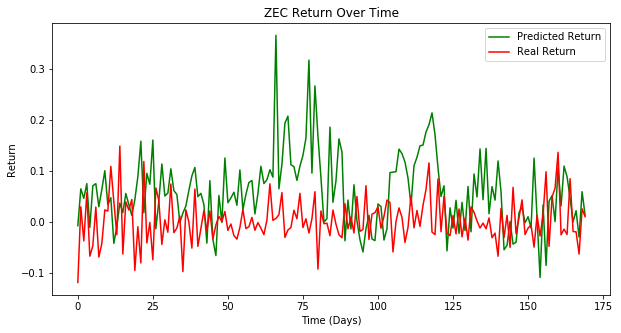

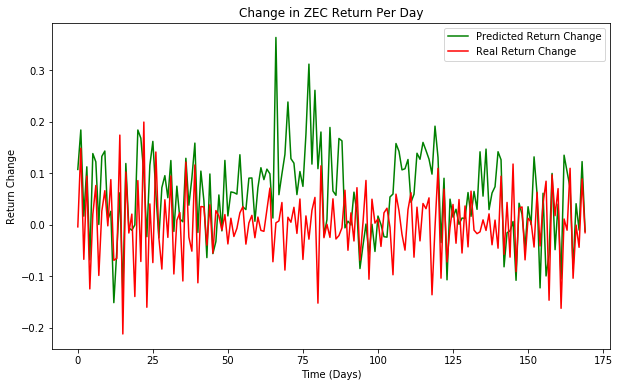

true positive is 79
true negative is 28
false negative is 11
false positive is 52
precision rate is 0.6031
accuracy rate is 0.6294
recall rate is 0.8778
F1 Score is 0.7149
[7.50635609e-03 1.03295846e-02 7.24298175e-03 3.62717487e-03
 1.52253692e-02 4.24592065e-03 5.07486178e-03 6.70043148e-03
 5.77065042e-03 6.90915526e-03 3.33903012e-03 2.65776824e-02
 4.05584384e-03 1.71382811e-02 6.64845820e-03 1.51442530e-02
 4.55108383e-03 1.81713179e-02 5.52807229e-02 1.80170154e-04
 7.26881909e-03 1.99816364e-02 2.32326876e-02 3.70340177e-03
 6.84279408e-03 8.92933507e-03 3.84889113e-03 3.81924803e-03
 0.00000000e+00 3.45136339e-03 3.59506556e-03 9.14920058e-03
 4.03997310e-03 1.74543260e-02 1.67312427e-02 1.60395971e-02
 1.59005225e-02 9.68087528e-03 2.75917427e-02 9.80052599e-03
 1.51794283e-02 3.01724289e-02 2.63509534e-02 4.97212806e-03
 1.64185872e-02 1.50544021e-02 1.06630528e-02 1.80611616e-02
 2.23759594e-02 1.59255938e-02 1.86643907e-02 9.13003113e-03
 1.84200724e-02 5.45108013e-03 4.69

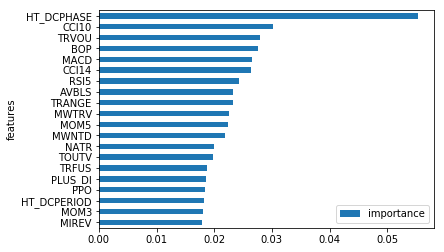

In [29]:
#test the model
y_predict, real_y_test, real_y_predict, fig,real_y_daybefore =test_model(model, X_test, Y_test)

#plot the return change per day
return_change_predict, return_change_real, fig_2 = return_change(real_y_daybefore, real_y_test, real_y_predict)

return_change_predict_1_0, return_change_real_1_0 = binary_return(return_change_predict,return_change_real)

#calculate confusion matrix statistics
true_pos, false_pos, true_neg, false_neg =  find_positives_negatives(return_change_predict_1_0, return_change_real_1_0)

print('true positive is',true_pos)
print('true negative is',true_neg)
print('false negative is',false_neg)
print('false positive is',false_pos)

precision = float(true_pos) / (true_pos + false_pos)
accuracy = float(true_pos+true_neg)/ (true_pos+true_neg+false_neg+false_pos)
recall=float(true_pos)/(true_pos+false_neg)
F1_score=2* (precision*recall)/(precision+recall)

print('precision rate is',round(precision,4))
print('accuracy rate is',round(accuracy,4))
print('recall rate is', round(recall,4))
print('F1 Score is',round(F1_score,4))

#feature importance
from keras.wrappers.scikit_learn import KerasRegressor
feature_importance = KerasRegressor(build_fn=model, epochs=100, batch_size=32)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_total_scaled = sc.fit_transform(dataset_total)

X_normal=dataset_total_scaled[:,:-1]
Y=dataset_total_scaled[:,-1]

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_normal, Y)

# show importance scores
print(model.feature_importances_)

import matplotlib.pyplot as plt
# plot importance scores
names = dataset_total.columns.values[:-1]
names = names.reshape(len(names),1)
importance= model.feature_importances_
importance =importance.reshape(len(importance),1)
print(names)
print(importance)

features= pd.DataFrame(names)
features['importance']=importance
features.columns=['features','importance'] 
graph=features.sort_values(by=['importance']).tail(20)
np.array(graph['importance']).shape
graph.info()
graph.plot.barh(x='features', y='importance')

In [30]:
# %load NN3
#!/usr/bin/env python

# In[1]:


import numpy as np
import talib
import pandas as pd
import os
import talib as ta
import time
import datetime

## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#for logging
import time

##matrix math
import math

##plotting
import matplotlib.pyplot as plt
from sklearn import preprocessing


# In[1]:


def load_data(filename,percent):
#Read the data file
    dataset_total = pd.read_csv(filename,na_values='n/a',parse_dates=['Date'],index_col='Date')
    dataset_total=dataset_total.drop(['Unnamed: 0',], axis=1)
    dataset_total= dataset_total.loc[:, (dataset_total!= 0).any(axis=0)]

    #normalize dataset
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_total_scaled = sc.fit_transform(dataset_total)
    X_normal=dataset_total_scaled[:,:-1]
    Y=dataset_total_scaled[:,-1]
    
    #Splitting data set into training (First 80% of data points) and testing data (last 20% of data points)
    split_line = round(percent * X_normal.shape[0])
    X_train = X_normal[:int(split_line), :]
    Y_train = Y[:int(split_line)]
    X_test = X_normal[int(split_line):,:]
    Y_test = Y[int(split_line):]
    Y_daybefore = Y[int(split_line)-1:-1]

    #shuffle the training set and test set
    #X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y, test_size=0.2, random_state=37)
    return X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore


# In[2]:


def initialize_model(dropout_rate):
    """
    Initializes and creates the model to be used
    
    Arguments:
    dropout_rate -- A decimal representing how much dropout should be incorporated at each level, in this case 0.2
    activation_function -- A string to define the activation_function, in this case it is linear
    loss_function -- A string to define the loss function to be used, in the case it is mean squared error
    optimizer -- A string to define the optimizer to be used, in the case it is adam
    
    Returns:
    model -- A 3 layer RNN with 100*dropout_value dropout in each layer that uses activation_function as its activation
             function, loss_function as its loss function, and optimizer as its optimizer
    """
  
    #Build the model
    model=Sequential()
    
   
    optimizer='adam'
    loss='mean_squared_error'
    activation='relu'
    input_shape = (X_train.shape[1],)
    model.add(Dense(units = 64,activation=activation, input_shape = input_shape))
    model.add(Dense(units = 64, activation=activation))
    model.add(Dense(units = 32, activation=activation))
    model.add(Dense(units = 1,activation='relu'))
   
    
              
    model.compile(optimizer =optimizer, loss = loss, metrics=['mse'])

    
    return model


# In[3]:


#Training the model

def fit_model(model, X_train, Y_train, batch_num, num_epoch, val_split):
    """
    Fits the model to the training data
    
    Arguments:
    model -- The previously initalized 3 layer Recurrent Neural Network
    X_train -- A tensor of shape (2492, 30, 105) that represents the x values of the training data
    Y_train -- A tensor of shape (2492,) that represents the y values of the training data
    batch_num -- An integer representing the batch size to be used, in this case 100
    num_epoch -- An integer defining the number of epochs to be run, in this case 100
    val_split -- A decimal representing the proportion of training data to be used as validation data
    
    Returns:
    model -- The 3 layer Recurrent Neural Network that has been fitted to the training data
    training_time -- An integer representing the amount of time (in seconds) that the model was training
    """
   

    #Train the model on X_train and Y_train
    history=model.fit(X_train, Y_train, batch_size= batch_num, nb_epoch=num_epoch, validation_split= val_split)

    return model,history


# In[5]:





# In[4]:


# test the model
def test_model(model_name, X_test, Y_test):
    """
    Test the model on the testing data
    
    Arguments:
    model -- The previously fitted 3 layer Recurrent Neural Network
    X_test -- A tensor of shape (623, 30, 105) that represents the x values of the testing data
    Y_test -- A tensor of shape (623,) that represents the y values of the testing data
    unnormalized_bases -- A tensor of shape (623,) that can be used to get unnormalized data points
    
    Returns:
    y_predict -- A tensor of shape (623,) that represnts the normalized values that the model predicts based on X_test
    real_y_test -- A tensor of shape (623,) that represents the actual prices of bitcoin throughout the testing period
    real_y_predict -- A tensor of shape (623,) that represents the model's predicted prices of bitcoin
    fig -- A branch of the graph of the real predicted prices of bitcoin versus the real prices of bitcoin
    """
    #Test the model on X_Test
    Y_norm = model_name.predict(X_test)
    
    # normalize predicted y
    Y_original=dataset_total.iloc[:,-1]
    Y_max=Y_original.max()
    Y_min=Y_original.min()
    real_y_predict = Y_norm *(Y_max-Y_min)+Y_min
    
    # normalize Y_test
    real_y_test = Y_test *(Y_max-Y_min)+Y_min
    
    # normalize real Y_daybefore
    real_y_daybefore = Y_daybefore * (Y_max-Y_min)+Y_min

    #Plot of the predicted prices versus the real prices
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("XRP Return Over Time")
    plt.plot(real_y_predict, color = 'green', label = 'Predicted Return')
    plt.plot(real_y_test, color = 'red', label = 'Real Return')
    ax.set_ylabel("Return")
    ax.set_xlabel("Time (Days)")
    ax.legend()
    
    return Y_norm, real_y_test, real_y_predict, fig, real_y_daybefore


# In[5]:


#evaluate change in return

def return_change(real_y_daybefore, real_y_test, real_y_predict):
    """
    Calculate the percent change between each value and the day before
    
    Arguments:
    real_y_daybefore -- A tensor of shape (623,) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (623,) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (623,) that represents the normalized y values of the model's predictions
    
    Returns:
    delta_predict -- A tensor of shape (623, ) that represents the difference between predicted and day before values
    delta_real -- A tensor of shape (623, ) that represents the difference between real and day before values
    fig -- A plot representing percent change in bitcoin price per day,
    """
    return_change_real = real_y_test - real_y_daybefore
    real_y_predict_reshape= np.reshape(real_y_predict,(real_y_predict.shape[0],))
    return_change_predict = real_y_predict_reshape - real_y_daybefore

    fig_2 = plt.figure(figsize=(10, 6))
    ax = fig_2.add_subplot(111)
    ax.set_title("Change in XRP Return Per Day")
    plt.plot(return_change_predict, color='green', label = 'Predicted Return Change')
    plt.plot(return_change_real, color='red', label = 'Real Return Change')
    plt.ylabel("Return Change")
    plt.xlabel("Time (Days)")
    ax.legend()
    plt.show()
    return  return_change_predict, return_change_real, fig_2


# In[8]:


def binary_return(return_change_predict,return_change_real):
    """
    Converts return change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    Arguments:
    delta_predict -- A tensor of shape (623, 1) that represents the predicted percent change in price
    delta_real -- A tensor of shape (623, 1) that represents the real percent change in price
    
    Returns:
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    return_change_predict_1_0 = np.empty(return_change_predict.shape)
    return_change_real_1_0 = np.empty(return_change_real.shape)

    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(return_change_predict.shape[0]):
        if return_change_predict[i] > 0:
            return_change_predict_1_0[i] = 1
        else:
            return_change_predict_1_0[i] = 0
  
    for i in range(return_change_real.shape[0]):
        if  return_change_real[i] > 0:
            return_change_real_1_0[i] = 1
        else:
            return_change_real_1_0[i] = 0
    return return_change_predict_1_0, return_change_real_1_0



# In[6]:


def find_positives_negatives(return_change_predict_1_0, return_change_real_1_0):
    """
    Finding the number of false positives, false negatives, true positives, true negatives
    
    Arguments: 
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    
    Returns:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    """
    #Finding the number of false positive/negatives and true positives/negatives
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(return_change_real_1_0.shape[0]):
        real = return_change_real_1_0[i]
        predicted = return_change_predict_1_0[i]
        if real == 1:
            if predicted == 1:
                true_pos += 1
            else:
                false_neg += 1
        elif real == 0:
            if predicted == 0:
                true_neg += 1
            else:
                false_pos += 1
    return true_pos, false_pos, true_neg, false_neg


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:






In [31]:
#XRP
#Load the data
X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore = load_data("merge_XRP-USD.csv",0.9)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

#initialize the model
model= initialize_model(0.2)
print (model.summary())

#fit the model
model,history = fit_model(model, X_train, Y_train, 32, 100, .2)

(1346, 110)
(1346,)
(150, 110)
(150,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                7104      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 13,377
Trainable params: 13,377
Non-trainable params: 0
_________________________________________________________________
None


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:127: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1076 samples, validate on 270 samples
Epoch 1/100
1076/1076 [==============================] - 1s 567us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 2/100
1076/1076 [==============================] - 0s 49us/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 3/100
1076/1076 [==============================] - 0s 46us/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/100
1076/1076 [==============================] - 0s 47us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/100
1076/1076 [==============================] - 0s 45us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 6/100
1076/1076 [==============================] - 0s 38us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_lo

1076/1076 [==============================] - 0s 42us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 50/100
1076/1076 [==============================] - 0s 48us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 51/100
1076/1076 [==============================] - 0s 53us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 52/100
1076/1076 [==============================] - 0s 45us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 53/100
1076/1076 [==============================] - 0s 45us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 54/100
1076/1076 [==============================] - 0s 43us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 55/10

Epoch 98/100
1076/1076 [==============================] - 0s 38us/step - loss: 8.9882e-04 - mean_squared_error: 8.9882e-04 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 99/100
1076/1076 [==============================] - 0s 36us/step - loss: 8.7946e-04 - mean_squared_error: 8.7946e-04 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 100/100
1076/1076 [==============================] - 0s 35us/step - loss: 7.9274e-04 - mean_squared_error: 7.9274e-04 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


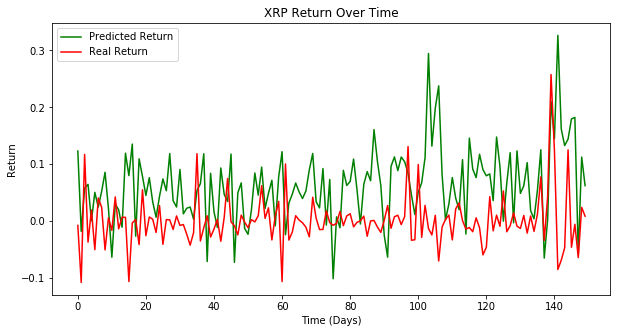

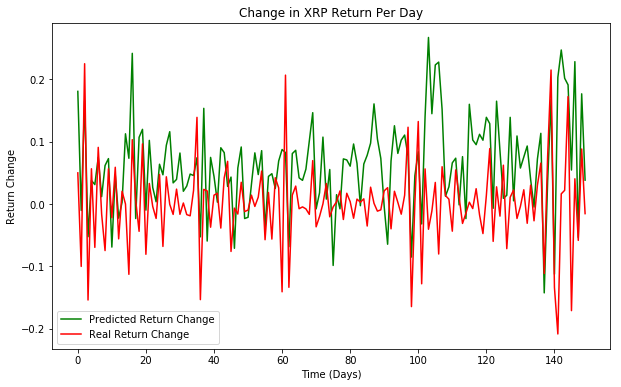

true positive is 72
true negative is 21
false negative is 7
false positive is 50
precision rate is 0.5902
accuracy rate is 0.62
recall rate is 0.9114
F1 Score is 0.7164
[6.52963386e-03 1.32811670e-02 9.15919974e-03 6.74844770e-03
 5.05260768e-03 7.27462552e-03 6.70087047e-03 6.63829259e-03
 8.47537162e-03 4.43498632e-03 2.38060227e-03 8.54955087e-03
 8.01905004e-03 7.71217115e-03 6.31621222e-03 1.60461203e-02
 1.18481296e-02 1.26853116e-02 1.53254617e-02 1.04467025e-03
 1.15104824e-02 4.81321224e-02 4.03046490e-02 4.82829998e-03
 6.18149863e-03 8.73709356e-03 2.89784462e-03 5.29462691e-03
 3.52557902e-03 6.42075789e-03 5.61123664e-03 1.40541599e-02
 3.96957568e-03 6.19700825e-03 5.52071006e-03 8.88180488e-03
 1.10321482e-02 4.89041463e-03 2.44684751e-02 9.19272345e-03
 1.64193258e-02 2.24780735e-02 2.48748436e-02 1.30283760e-02
 1.06396950e-02 1.57870861e-02 1.44702075e-02 1.28551826e-02
 1.38664678e-02 9.08311445e-03 9.03732357e-03 1.27763696e-02
 1.02351228e-02 8.55765526e-03 1.06980

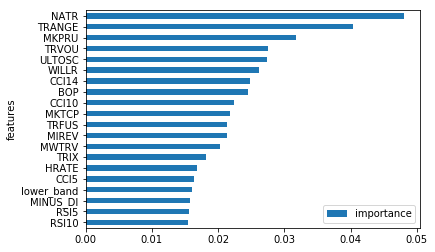

In [32]:
#test the model
y_predict, real_y_test, real_y_predict, fig,real_y_daybefore =test_model(model, X_test, Y_test)

#plot the return change per day
return_change_predict, return_change_real, fig_2 = return_change(real_y_daybefore, real_y_test, real_y_predict)

return_change_predict_1_0, return_change_real_1_0 = binary_return(return_change_predict,return_change_real)

#calculate confusion matrix statistics
true_pos, false_pos, true_neg, false_neg =  find_positives_negatives(return_change_predict_1_0, return_change_real_1_0)

print('true positive is',true_pos)
print('true negative is',true_neg)
print('false negative is',false_neg)
print('false positive is',false_pos)

precision = float(true_pos) / (true_pos + false_pos)
accuracy = float(true_pos+true_neg)/ (true_pos+true_neg+false_neg+false_pos)
recall=float(true_pos)/(true_pos+false_neg)
F1_score=2* (precision*recall)/(precision+recall)

print('precision rate is',round(precision,4))
print('accuracy rate is',round(accuracy,4))
print('recall rate is', round(recall,4))
print('F1 Score is',round(F1_score,4))
#feature importance
from keras.wrappers.scikit_learn import KerasRegressor
feature_importance = KerasRegressor(build_fn=model, epochs=100, batch_size=32)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_total_scaled = sc.fit_transform(dataset_total)

X_normal=dataset_total_scaled[:,:-1]
Y=dataset_total_scaled[:,-1]

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_normal, Y)

# show importance scores
print(model.feature_importances_)

import matplotlib.pyplot as plt
# plot importance scores
names = dataset_total.columns.values[:-1]
names = names.reshape(len(names),1)
importance= model.feature_importances_
importance =importance.reshape(len(importance),1)
print(names)
print(importance)

features= pd.DataFrame(names)
features['importance']=importance
features.columns=['features','importance'] 
graph=features.sort_values(by=['importance']).tail(20)
np.array(graph['importance']).shape
graph.info()
graph.plot.barh(x='features', y='importance')

In [33]:
# %load NN3
#!/usr/bin/env python

# In[1]:


import numpy as np
import talib
import pandas as pd
import os
import talib as ta
import time
import datetime

## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#for logging
import time

##matrix math
import math

##plotting
import matplotlib.pyplot as plt
from sklearn import preprocessing


# In[1]:


def load_data(filename,percent):
#Read the data file
    dataset_total = pd.read_csv(filename,na_values='n/a',parse_dates=['Date'],index_col='Date')
    dataset_total=dataset_total.drop(['Unnamed: 0',], axis=1)
    dataset_total= dataset_total.loc[:, (dataset_total!= 0).any(axis=0)]


    #normalize dataset
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_total_scaled = sc.fit_transform(dataset_total)
    X_normal=dataset_total_scaled[:,:-1]
    Y=dataset_total_scaled[:,-1]
    
    #Splitting data set into training (First 80% of data points) and testing data (last 20% of data points)
    split_line = round(percent * X_normal.shape[0])
    X_train = X_normal[:int(split_line), :]
    Y_train = Y[:int(split_line)]
    X_test = X_normal[int(split_line):,:]
    Y_test = Y[int(split_line):]
    Y_daybefore = Y[int(split_line)-1:-1]

    #shuffle the training set and test set
    #X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y, test_size=0.2, random_state=37)
    return X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore


# In[2]:


def initialize_model(dropout_rate):
    """
    Initializes and creates the model to be used
    
    Arguments:
    dropout_rate -- A decimal representing how much dropout should be incorporated at each level, in this case 0.2
    activation_function -- A string to define the activation_function, in this case it is linear
    loss_function -- A string to define the loss function to be used, in the case it is mean squared error
    optimizer -- A string to define the optimizer to be used, in the case it is adam
    
    Returns:
    model -- A 3 layer RNN with 100*dropout_value dropout in each layer that uses activation_function as its activation
             function, loss_function as its loss function, and optimizer as its optimizer
    """
  
    #Build the model
    model=Sequential()
    
   
    optimizer='adam'
    loss='mean_squared_error'
    activation='relu'
    input_shape = (X_train.shape[1],)
    model.add(Dense(units = 64,activation=activation, input_shape = input_shape))
    model.add(Dense(units = 64, activation=activation))
    model.add(Dense(units = 32, activation=activation))
    model.add(Dense(units = 1,activation='relu'))
   
    
              
    model.compile(optimizer =optimizer, loss = loss, metrics=['mse'])

    
    return model


# In[3]:


#Training the model

def fit_model(model, X_train, Y_train, batch_num, num_epoch, val_split):
    """
    Fits the model to the training data
    
    Arguments:
    model -- The previously initalized 3 layer Recurrent Neural Network
    X_train -- A tensor of shape (2492, 30, 105) that represents the x values of the training data
    Y_train -- A tensor of shape (2492,) that represents the y values of the training data
    batch_num -- An integer representing the batch size to be used, in this case 100
    num_epoch -- An integer defining the number of epochs to be run, in this case 100
    val_split -- A decimal representing the proportion of training data to be used as validation data
    
    Returns:
    model -- The 3 layer Recurrent Neural Network that has been fitted to the training data
    training_time -- An integer representing the amount of time (in seconds) that the model was training
    """
   

    #Train the model on X_train and Y_train
    history=model.fit(X_train, Y_train, batch_size= batch_num, nb_epoch=num_epoch, validation_split= val_split)

    return model,history


# In[5]:





# In[4]:


# test the model
def test_model(model_name, X_test, Y_test):
    """
    Test the model on the testing data
    
    Arguments:
    model -- The previously fitted 3 layer Recurrent Neural Network
    X_test -- A tensor of shape (623, 30, 105) that represents the x values of the testing data
    Y_test -- A tensor of shape (623,) that represents the y values of the testing data
    unnormalized_bases -- A tensor of shape (623,) that can be used to get unnormalized data points
    
    Returns:
    y_predict -- A tensor of shape (623,) that represnts the normalized values that the model predicts based on X_test
    real_y_test -- A tensor of shape (623,) that represents the actual prices of bitcoin throughout the testing period
    real_y_predict -- A tensor of shape (623,) that represents the model's predicted prices of bitcoin
    fig -- A branch of the graph of the real predicted prices of bitcoin versus the real prices of bitcoin
    """
    #Test the model on X_Test
    Y_norm = model_name.predict(X_test)
    
    # normalize predicted y
    Y_original=dataset_total.iloc[:,-1]
    Y_max=Y_original.max()
    Y_min=Y_original.min()
    real_y_predict = Y_norm *(Y_max-Y_min)+Y_min
    
    # normalize Y_test
    real_y_test = Y_test *(Y_max-Y_min)+Y_min
    
    # normalize real Y_daybefore
    real_y_daybefore = Y_daybefore * (Y_max-Y_min)+Y_min

    #Plot of the predicted prices versus the real prices
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("Bitcoin Return Over Time")
    plt.plot(real_y_predict, color = 'green', label = 'Predicted Return')
    plt.plot(real_y_test, color = 'red', label = 'Real Return')
    ax.set_ylabel("Return")
    ax.set_xlabel("Time (Days)")
    ax.legend()
    
    return Y_norm, real_y_test, real_y_predict, fig, real_y_daybefore


# In[5]:


#evaluate change in return

def return_change(real_y_daybefore, real_y_test, real_y_predict):
    """
    Calculate the percent change between each value and the day before
    
    Arguments:
    real_y_daybefore -- A tensor of shape (623,) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (623,) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (623,) that represents the normalized y values of the model's predictions
    
    Returns:
    delta_predict -- A tensor of shape (623, ) that represents the difference between predicted and day before values
    delta_real -- A tensor of shape (623, ) that represents the difference between real and day before values
    fig -- A plot representing percent change in bitcoin price per day,
    """
    return_change_real = real_y_test - real_y_daybefore
    real_y_predict_reshape= np.reshape(real_y_predict,(real_y_predict.shape[0],))
    return_change_predict = real_y_predict_reshape - real_y_daybefore

    fig_2 = plt.figure(figsize=(10, 6))
    ax = fig_2.add_subplot(111)
    ax.set_title("Change in Bitcoin Return Per Day")
    plt.plot(return_change_predict, color='green', label = 'Predicted Return Change')
    plt.plot(return_change_real, color='red', label = 'Real Return Change')
    plt.ylabel("Return Change")
    plt.xlabel("Time (Days)")
    ax.legend()
    plt.show()
    return  return_change_predict, return_change_real, fig_2


# In[8]:


def binary_return(return_change_predict,return_change_real):
    """
    Converts return change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    Arguments:
    delta_predict -- A tensor of shape (623, 1) that represents the predicted percent change in price
    delta_real -- A tensor of shape (623, 1) that represents the real percent change in price
    
    Returns:
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    return_change_predict_1_0 = np.empty(return_change_predict.shape)
    return_change_real_1_0 = np.empty(return_change_real.shape)

    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(return_change_predict.shape[0]):
        if return_change_predict[i] > 0:
            return_change_predict_1_0[i] = 1
        else:
            return_change_predict_1_0[i] = 0
  
    for i in range(return_change_real.shape[0]):
        if  return_change_real[i] > 0:
            return_change_real_1_0[i] = 1
        else:
            return_change_real_1_0[i] = 0
    return return_change_predict_1_0, return_change_real_1_0



# In[6]:


def find_positives_negatives(return_change_predict_1_0, return_change_real_1_0):
    """
    Finding the number of false positives, false negatives, true positives, true negatives
    
    Arguments: 
    delta_predict_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (623, 1) that represents the binary version of delta_real
    
    Returns:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    """
    #Finding the number of false positive/negatives and true positives/negatives
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(return_change_real_1_0.shape[0]):
        real = return_change_real_1_0[i]
        predicted = return_change_predict_1_0[i]
        if real == 1:
            if predicted == 1:
                true_pos += 1
            else:
                false_neg += 1
        elif real == 0:
            if predicted == 0:
                true_neg += 1
            else:
                false_pos += 1
    return true_pos, false_pos, true_neg, false_neg


# In[ ]:





# In[ ]:





# In[ ]:





# In[ ]:






(2964, 73)
(2964,)
(180, 73)
(180,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                4736      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________
None


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2371 samples, validate on 593 samples
Epoch 1/100
2371/2371 [==============================] - 1s 248us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 2/100
2371/2371 [==============================] - 0s 40us/step - loss: 7.7012e-04 - mean_squared_error: 7.7012e-04 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/100
2371/2371 [==============================] - 0s 38us/step - loss: 6.0106e-04 - mean_squared_error: 6.0106e-04 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/100
2371/2371 [==============================] - 0s 40us/step - loss: 5.7374e-04 - mean_squared_error: 5.7374e-04 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/100
2371/2371 [==============================] - 0s 43us/step - loss: 5.8998e-04 - mean_squared_error: 5.8998e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/100
2371/2371 [==============================] - 0s 42us/step - loss: 5.7106e-04 -

2371/2371 [==============================] - 0s 41us/step - loss: 3.7586e-04 - mean_squared_error: 3.7586e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 47/100
2371/2371 [==============================] - 0s 42us/step - loss: 2.9074e-04 - mean_squared_error: 2.9074e-04 - val_loss: 5.2640e-04 - val_mean_squared_error: 5.2640e-04
Epoch 48/100
2371/2371 [==============================] - 0s 39us/step - loss: 3.1482e-04 - mean_squared_error: 3.1482e-04 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 49/100
2371/2371 [==============================] - 0s 39us/step - loss: 3.1745e-04 - mean_squared_error: 3.1745e-04 - val_loss: 6.3723e-04 - val_mean_squared_error: 6.3723e-04
Epoch 50/100
2371/2371 [==============================] - 0s 41us/step - loss: 3.3524e-04 - mean_squared_error: 3.3524e-04 - val_loss: 8.0492e-04 - val_mean_squared_error: 8.0492e-04
Epoch 51/100
2371/2371 [==============================] - 0s 37us/step - loss: 3.8654e-04 - mean_squared_error: 3.

2371/2371 [==============================] - 0s 50us/step - loss: 3.4263e-04 - mean_squared_error: 3.4263e-04 - val_loss: 7.4157e-04 - val_mean_squared_error: 7.4157e-04
Epoch 92/100
2371/2371 [==============================] - 0s 61us/step - loss: 4.2796e-04 - mean_squared_error: 4.2796e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 93/100
2371/2371 [==============================] - 0s 62us/step - loss: 5.3394e-04 - mean_squared_error: 5.3394e-04 - val_loss: 4.5801e-04 - val_mean_squared_error: 4.5801e-04
Epoch 94/100
2371/2371 [==============================] - 0s 59us/step - loss: 2.6594e-04 - mean_squared_error: 2.6594e-04 - val_loss: 4.9080e-04 - val_mean_squared_error: 4.9080e-04
Epoch 95/100
2371/2371 [==============================] - 0s 43us/step - loss: 2.4946e-04 - mean_squared_error: 2.4946e-04 - val_loss: 4.1373e-04 - val_mean_squared_error: 4.1373e-04
Epoch 96/100
2371/2371 [==============================] - 0s 38us/step - loss: 2.2384e-04 - mean_squared_e

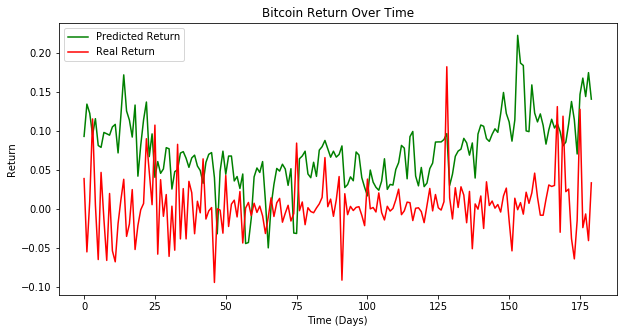

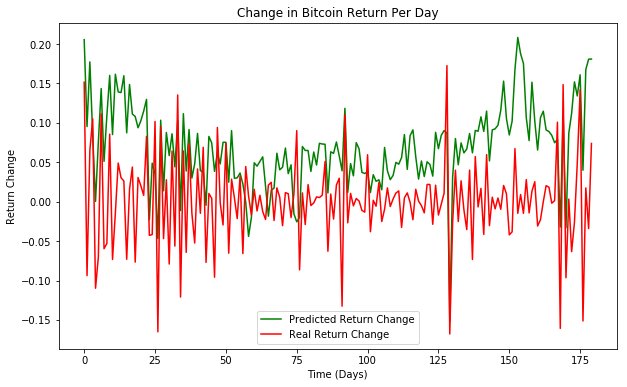

true positive is 91
true negative is 9
false negative is 5
false positive is 75
precision rate is 0.5482
accuracy rate is 0.5556
recall rate is 0.9479
F1 Score is 0.6947


In [34]:
#Bitcoin
#Load the data
X_train, Y_train, X_test, Y_test, dataset_total,Y_daybefore = load_data("Bitcoin_revised.csv",0.9428)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

#initialize the model
model= initialize_model(0.2)
print (model.summary())

#fit the model
model,history = fit_model(model, X_train, Y_train, 32, 100, .2)
#test the model
y_predict, real_y_test, real_y_predict, fig,real_y_daybefore =test_model(model, X_test, Y_test)

#plot the return change per day
return_change_predict, return_change_real, fig_2 = return_change(real_y_daybefore, real_y_test, real_y_predict)

return_change_predict_1_0, return_change_real_1_0 = binary_return(return_change_predict,return_change_real)

#calculate confusion matrix statistics
true_pos, false_pos, true_neg, false_neg =  find_positives_negatives(return_change_predict_1_0, return_change_real_1_0)

print('true positive is',true_pos)
print('true negative is',true_neg)
print('false negative is',false_neg)
print('false positive is',false_pos)

precision = float(true_pos) / (true_pos + false_pos)
accuracy = float(true_pos+true_neg)/ (true_pos+true_neg+false_neg+false_pos)
recall=float(true_pos)/(true_pos+false_neg)
F1_score=2* (precision*recall)/(precision+recall)

print('precision rate is',round(precision,4))
print('accuracy rate is',round(accuracy,4))
print('recall rate is', round(recall,4))
print('F1 Score is',round(F1_score,4))

In [35]:
#feature importance
from keras.wrappers.scikit_learn import KerasRegressor
feature_importance = KerasRegressor(build_fn=model, epochs=100, batch_size=32)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_total_scaled = sc.fit_transform(dataset_total)

X_normal=dataset_total_scaled[:,:-1]
Y=dataset_total_scaled[:,-1]

model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_normal, Y)

# show importance scores
print(model.feature_importances_)

[2.23718329e-03 2.60818128e-03 3.20383064e-03 1.76687028e-03
 1.97865245e-03 7.20846189e-03 2.07466270e-03 1.23757083e-03
 1.68141769e-03 2.10557785e-03 1.46804428e-03 6.20967578e-03
 1.50507190e-03 4.17376966e-03 2.20349305e-03 1.17488761e-02
 1.52062590e-02 1.41641646e-02 1.17181569e-02 1.35655983e-04
 3.40485187e-03 8.86922206e-02 6.53886510e-03 1.79034088e-03
 2.12540004e-03 1.75794870e-03 1.24451267e-03 1.00633267e-03
 6.30791961e-06 1.56131255e-03 1.25362382e-03 1.94528044e-03
 1.23368165e-03 1.18320375e-02 1.66838673e-02 1.24682620e-02
 5.09700184e-03 6.67948166e-03 1.22620826e-02 6.47623308e-03
 1.48216961e-02 1.31359642e-02 1.12215836e-02 1.60504841e-02
 1.20779047e-02 1.28356561e-02 8.81433134e-03 8.73729290e-03
 8.74629793e-03 5.39593053e-03 1.44157188e-02 4.23056343e-03
 3.71928053e-01 1.75591771e-02 1.52016195e-02 1.52930023e-02
 1.58323401e-02 1.05640400e-02 1.11935974e-02 1.44553897e-02
 2.41595194e-02 2.02060689e-02 1.35270984e-02 1.89204820e-03
 1.11022888e-02 1.588134

[['Open']
 ['High']
 ['Low']
 ['Close']
 ['Adj Close']
 ['Volume']
 ['ma7']
 ['ma21']
 ['ema']
 ['26ema']
 ['12ema']
 ['MACD']
 ['momentum']
 ['20sd']
 ['upper_band']
 ['lower_band']
 ['RSI']
 ['HT_DCPERIOD']
 ['HT_DCPHASE']
 ['HT_TRENDMODE']
 ['ATR']
 ['NATR']
 ['TRANGE']
 ['DEMA']
 ['HT_TRENDLINE']
 ['KAMA']
 ['MIDPOINT']
 ['MIDPRICE']
 ['SAR']
 ['SMA10']
 ['T3']
 ['TRIMA']
 ['WMA']
 ['ADX14']
 ['ADX20']
 ['ADXR']
 ['APO']
 ['AROONOSC']
 ['BOP']
 ['CCI3']
 ['CCI5']
 ['CCI10']
 ['CCI14']
 ['CMO']
 ['DX']
 ['MINUS_DI']
 ['MINUS_DM']
 ['MOM3']
 ['MOM5']
 ['MOM10']
 ['PLUS_DI']
 ['PLUS_DM']
 ['PPO']
 ['ROC']
 ['ROCP']
 ['ROCR']
 ['ROCR100']
 ['RSI5']
 ['RSI10']
 ['RSI14']
 ['TRIX']
 ['ULTOSC']
 ['WILLR']
 ['MKTCP']
 ['AVBLS']
 ['TOUTV']
 ['TRFUS']
 ['CPTRA']
 ['TRVOU']
 ['MKPRU']
 ['HRATE']
 ['DIFF']
 ['MIREV']]
[[2.23718329e-03]
 [2.60818128e-03]
 [3.20383064e-03]
 [1.76687028e-03]
 [1.97865245e-03]
 [7.20846189e-03]
 [2.07466270e-03]
 [1.23757083e-03]
 [1.68141769e-03]
 [2.10557785e-03

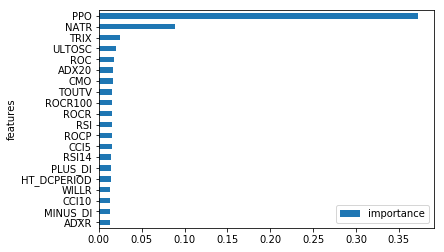

In [36]:
import matplotlib.pyplot as plt
# plot importance scores
names = dataset_total.columns.values[:-1]
names = names.reshape(len(names),1)
importance= model.feature_importances_
importance =importance.reshape(len(importance),1)
print(names)
print(importance)

features= pd.DataFrame(names)
features['importance']=importance
features.columns=['features','importance'] 
graph=features.sort_values(by=['importance']).tail(20)
np.array(graph['importance']).shape
graph.info()
graph.plot.barh(x='features', y='importance')